In [ ]:
! pip install tensorflow==2.2.0-rc0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'ibrahimelsayed25'
os.environ['KAGGLE_KEY'] = '25a6464f924d5e6d63c61bf5632955b2'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:06<00:00, 36.8MB/s]
100% 207M/207M [00:06<00:00, 33.0MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0006.jpg', '0972.jpg', '1369.jpg', '0901.jpeg', '0309.jpg', '1067.jpg', '0763.jpg', '1103.png', '1020.jpg', '0746.jpg']
['132.jpg', '51.jpg', '170.jpg', '249.jpg', '156.jpg', '39.jpg', '104.jpg', '195.jpg', '176.jpg', '260.jpg']


Visualization of the mask and non-mask images

['/content/New Masks Dataset/Train/Mask/0006.jpg', '/content/New Masks Dataset/Train/Mask/0972.jpg', '/content/New Masks Dataset/Train/Mask/1369.jpg', '/content/New Masks Dataset/Train/Mask/0901.jpeg', '/content/New Masks Dataset/Train/Mask/0309.jpg', '/content/New Masks Dataset/Train/Mask/1067.jpg', '/content/New Masks Dataset/Train/Mask/0763.jpg', '/content/New Masks Dataset/Train/Mask/1103.png']
['/content/New Masks Dataset/Train/Non Mask/132.jpg', '/content/New Masks Dataset/Train/Non Mask/51.jpg', '/content/New Masks Dataset/Train/Non Mask/170.jpg', '/content/New Masks Dataset/Train/Non Mask/249.jpg', '/content/New Masks Dataset/Train/Non Mask/156.jpg', '/content/New Masks Dataset/Train/Non Mask/39.jpg', '/content/New Masks Dataset/Train/Non Mask/104.jpg', '/content/New Masks Dataset/Train/Non Mask/195.jpg']


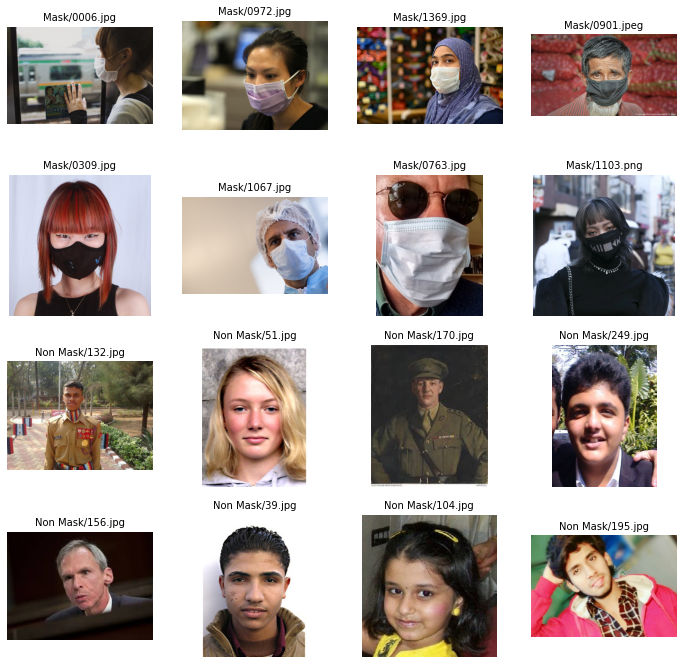

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

marged_list = mask_pic + nomask_pic

for i in range(0,len(marged_list)):
  data = marged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(marged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data= valid_generator)

Epoch 1/30
19/19 [==============================] - 38s 2s/step - loss: 3.8411 - accuracy: 0.4900 - val_loss: 0.6928 - val_accuracy: 0.5229
Epoch 2/30
19/19 [==============================] - 37s 2s/step - loss: 0.6867 - accuracy: 0.5700 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 37s 2s/step - loss: 0.6778 - accuracy: 0.5100 - val_loss: 0.6924 - val_accuracy: 0.5556
Epoch 4/30
19/19 [==============================] - 37s 2s/step - loss: 0.6400 - accuracy: 0.6317 - val_loss: 0.6653 - val_accuracy: 0.7222
Epoch 5/30
19/19 [==============================] - 37s 2s/step - loss: 0.4803 - accuracy: 0.8000 - val_loss: 0.4763 - val_accuracy: 0.8105
Epoch 6/30
19/19 [==============================] - 37s 2s/step - loss: 0.3838 - accuracy: 0.8383 - val_loss: 0.4931 - val_accuracy: 0.7680
Epoch 7/30
19/19 [==============================] - 37s 2s/step - loss: 0.3264 - accuracy: 0.8783 - val_loss: 0.4027 - val_accuracy: 0.8824
Epoch 8/30
19/19 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

Text(0.5, 0, 'epoch')

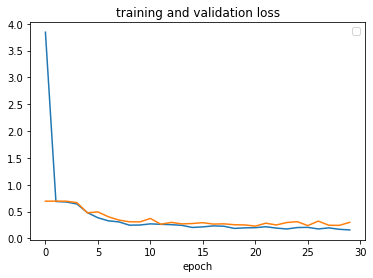

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend('training','validation')
plt.title('training and validation loss')
plt.xlabel('epoch')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

Text(0.5, 0, 'epoch')

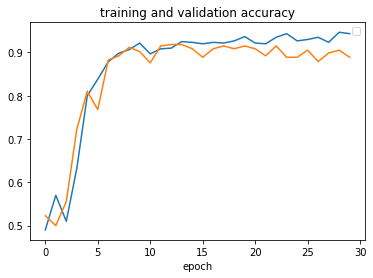

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend('training','validation')
plt.title('training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss: {} test accuracy:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 370ms/step - loss: 0.2655 - accuracy: 0.8700
test loss: 0.2654772400856018 test accuracy:0.8700000047683716


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/' + fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')
  else:
    print('no mask')

Saving p1.jpg to p1 (1).jpg
Saving p2.jpg to p2 (1).jpg
p1.jpg
mask
p2.jpg
no mask


In [ ]:
model.save('model.h5')